In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
%matplotlib inline

In [2]:
filename = 'data/curved_lens_z_om_lambda_0.0.csv'
# filename = 'data/dopri5_lens_z_omlambda_0.0.csv'
df = pd.read_csv(filename)
df.head()

,lens_z,om_k,percentage_err,step
0,0.0500,0.1,-0.005732,1.000000e-07
1,0.0875,0.1,-0.002295,1.000000e-07
2,0.1250,0.1,-0.001098,1.000000e-07
3,0.1625,0.1,0.002343,1.000000e-07
4,0.2000,0.1,0.005173,1.000000e-07


In [3]:
df.drop_duplicates(inplace=True)

In [4]:
stats = df[['step', 'percentage_err']].groupby('step').agg(['mean', 'std', 'count'])
stats.columns = [' '.join(col).strip() for col in stats.columns.values]
stats['percentage_err mean std'] = stats['percentage_err std']/np.sqrt(stats['percentage_err count'])
stats

,percentage_err mean,percentage_err std,percentage_err count,percentage_err mean std
step,,,,
1.000000e-07,-0.000322,0.004215,5,0.001885
2.000000e-07,-0.003119,0.003969,23,0.000828
2.210526e-07,-0.003361,0.004445,20,0.000994
2.421053e-07,-0.001603,0.004582,20,0.001025
2.631579e-07,-0.003522,0.003936,20,0.000880
2.842105e-07,-0.003621,0.004204,20,0.000940
3.000000e-07,-0.003571,0.003491,5,0.001561
3.052632e-07,-0.002901,0.005158,20,0.001153
3.263158e-07,-0.001070,0.004958,20,0.001109


In [5]:
# stats[stats['percentage_err mean'].abs() == stats['percentage_err mean'].abs().min()]
best_step_size = stats['percentage_err mean'].abs().idxmin()
print("This is the step size that gives the most accurate result: ", best_step_size)
print("This step size has mean of ", stats['percentage_err mean'].abs().min())

This is the step size that gives the most accurate result:  4.52631578947e-07
This step size has mean of  0.000238180330132


In [6]:
stats[stats.index > 6e-7]

,percentage_err mean,percentage_err std,percentage_err count,percentage_err mean std
step,,,,
7.000000e-07,0.005056,0.009847,5,0.004404
8.000000e-07,0.002349,0.008525,5,0.003813
9.000000e-07,0.007379,0.012420,5,0.005554
1.000000e-06,0.005051,0.011694,5,0.005230


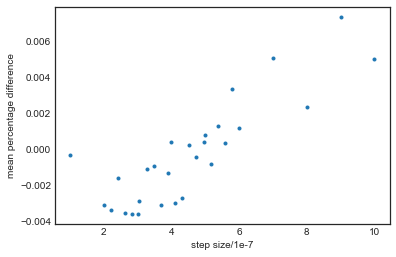

In [7]:
plt.plot(stats.index.values/1e-7, stats['percentage_err mean'].values, '.')
plt.xlabel('step size/1e-7')
plt.ylabel('mean percentage difference')

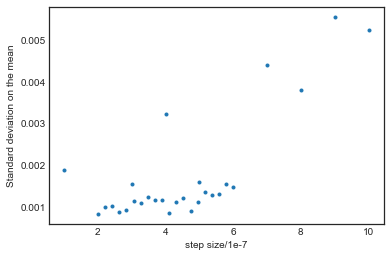

In [8]:
plt.plot(stats.index.values/1e-7, stats['percentage_err mean std'].abs().values, '.')
plt.xlabel('step size/1e-7')
plt.ylabel('Standard deviation on the mean')

In [9]:
# filename = 'data/mass_omlambda_0.0.csv'
# df = pd.read_csv(filename)
# df.drop_duplicates(inplace=True)
# stats = df[['step', 'percentage_err']].groupby('step').agg(['mean', 'std', 'count'])
# stats.columns = [' '.join(col).strip() for col in stats.columns.values]
# stats['percentage_err mean std'] = stats['percentage_err std']/np.sqrt(stats['percentage_err count'])
# stats

In [10]:
# plt.plot(stats.index.values/1e-7, stats['percentage_err mean'].abs().values, '.')
# plt.xlabel('step size/1e-7')
# plt.ylabel('mean percentage difference')

In [11]:
# plt.plot(stats.index.values/1e-7, stats['percentage_err mean std'].abs().values, '.')
# plt.xlabel('step size/1e-7')
# plt.ylabel('Standard deviation on the mean')